In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar

In [2]:
df = pd.read_csv('dataset/Uber Drives.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.rename(columns={
    'START_DATE*': 'START_DATE',
    'END_DATE*': 'END_DATE',
    'CATEGORY*': 'CATEGORY',
    'START*': 'START', 
    'STOP*': 'STOP',
    'MILES*': 'MILES',
    'PURPOSE*': 'PURPOSE'
}, inplace=True)

### Checking For Missing Values

In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:
df.isnull().any()

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [9]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [10]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m/%d/%Y %H:%M')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m/%d/%Y %H:%M')

In [11]:
df['START_DATE'].dtype

dtype('<M8[ns]')

In [12]:
df['START_DATE']

0      2016-01-01 21:11:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
5      2016-01-06 17:15:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE, Length: 653, dtype: datetime64[ns]

In [13]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [14]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in df['START_DATE']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

In [15]:
df['HOUR'] = hour
df['DAY'] = day
df['DAY_OF_WEEK'] = dayofweek
df['MONTH'] = month
df['WEEKDAY'] = weekday

In [16]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


### Category

In [17]:
df['CATEGORY'].value_counts()

Business    647
Personal      6
Name: CATEGORY, dtype: int64

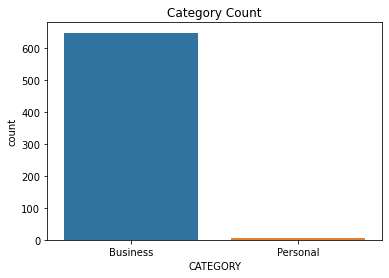

In [18]:
plt.title('Category Count')
sns.countplot(x='CATEGORY', data=df)
plt.show()

### How long people travel with uber

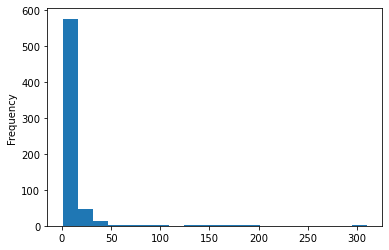

In [19]:
df['MILES'].plot.hist(bins=20)
plt.show()

In [20]:
df['MILES'].value_counts()

9.9      26
3.1      21
10.4     17
3.0      13
6.1      13
         ..
28.8      1
201.0     1
310.3     1
23.0      1
48.2      1
Name: MILES, Length: 205, dtype: int64

### What hour Do Most People Take Uber To Their Destination

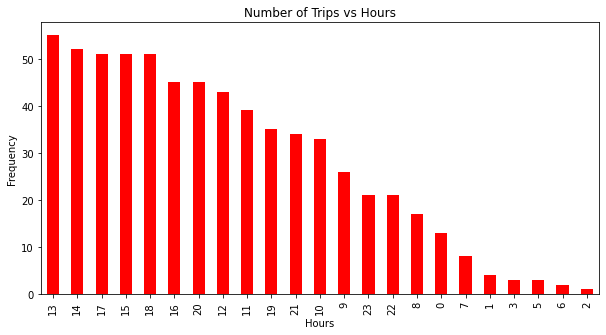

In [21]:
hours = df['START_DATE'].dt.hour.value_counts()
hours.plot.bar(color='red', figsize=(10, 5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs Hours')
plt.show()

### Check The Purpose of Trips

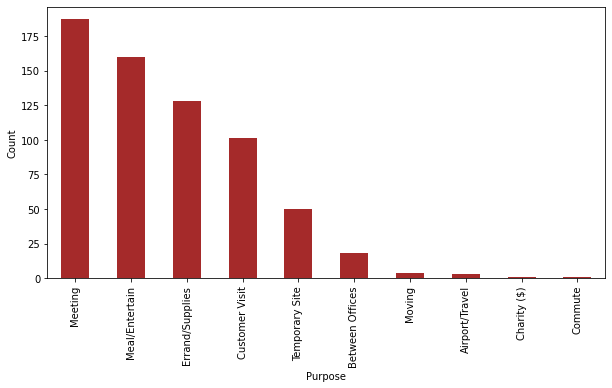

In [22]:
df['PURPOSE'].value_counts().plot.bar(color='brown', figsize=(10, 5))
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

### Which day has Highest Number Of Trips

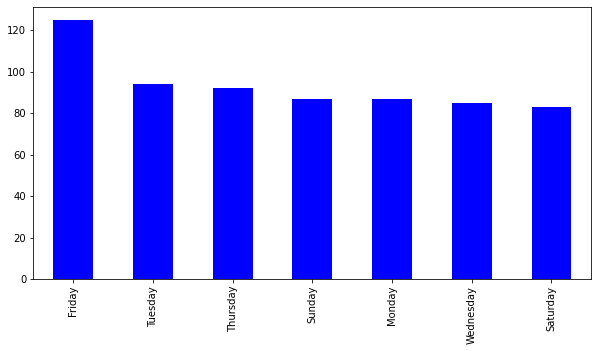

In [23]:
df['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue')
plt.show()

### What are the Number Of Trips Per Each Day?

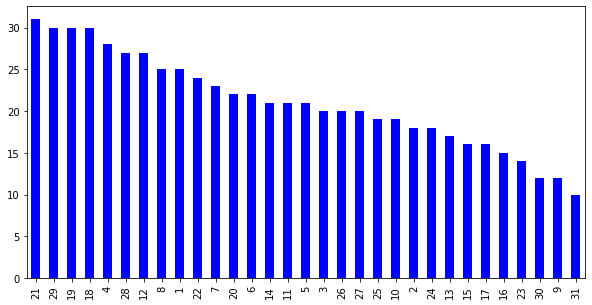

In [24]:
df['DAY'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue')
plt.show()

### What are the Trips in the Month

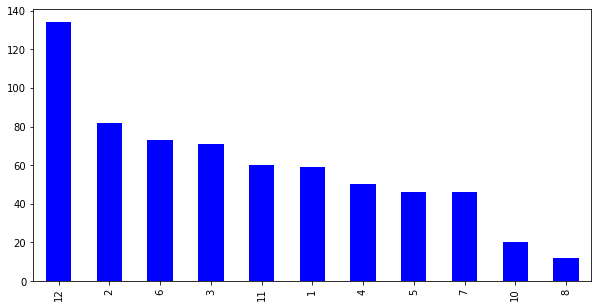

In [25]:
df['MONTH'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue')
plt.show()

### The Starting Points of the trips. Where Do People Start Boarding Their Trip From Most?

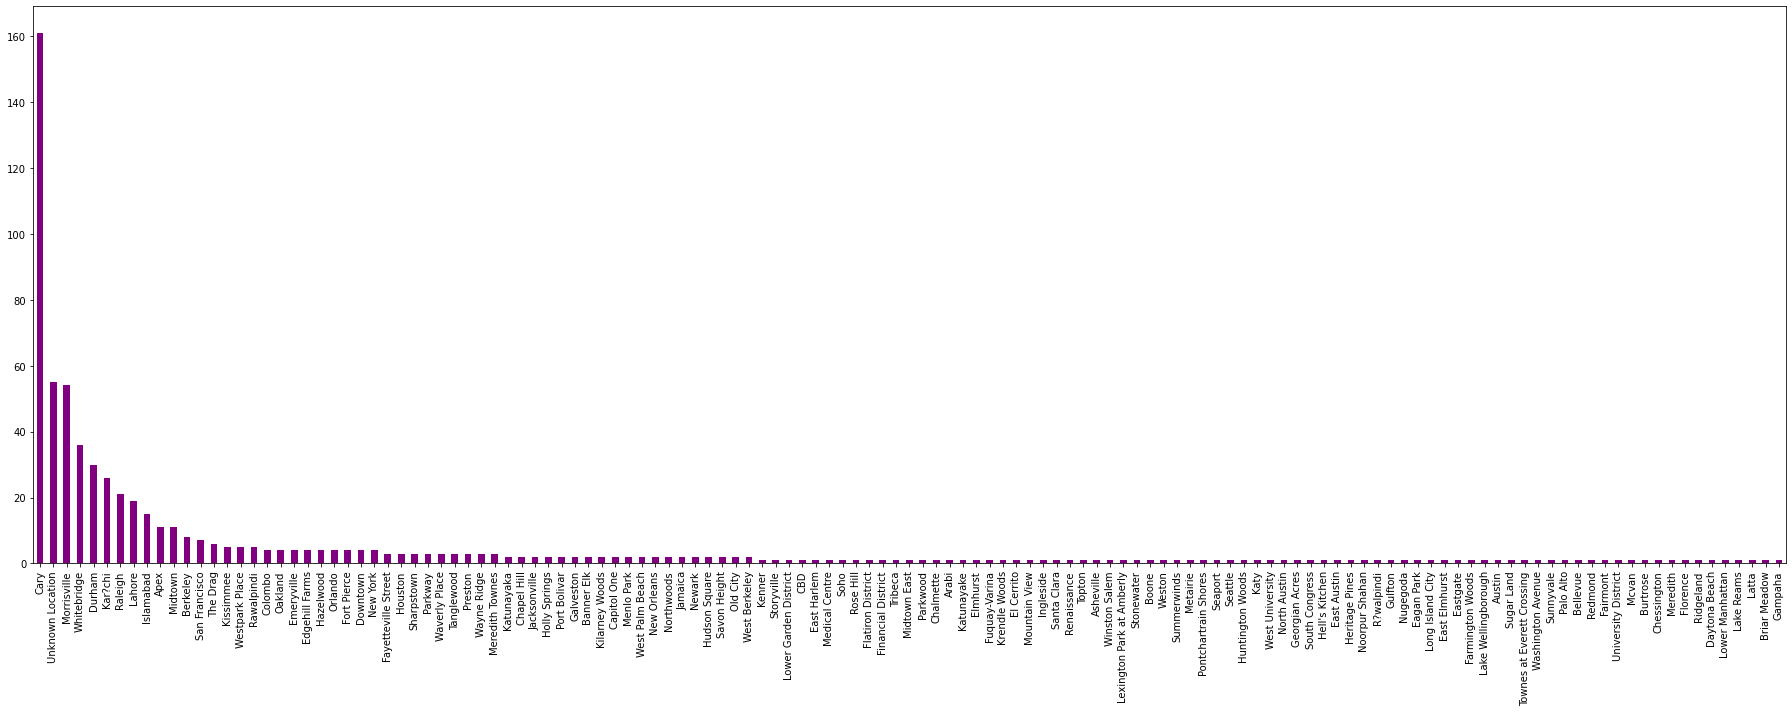

In [26]:
df['START'].value_counts().plot(kind='bar', figsize=(25, 10), color='purple')
plt.tight_layout()
plt.show()